In [214]:
library(tidyverse)
library(broom)
library(patchwork)

### Data

In [215]:
df <- read.delim(file = "../data/movie_budget.txt", sep = " ") 
df <- drop_na(df)

In [217]:
head(df)

,title,year,length,budget
,<chr>,<int>,<int>,<int>
1,'G' Men,1935,85,450000
2,'Manos' the Hands of Fate,1966,74,19000
3,'Til There Was You,1997,113,23000000
4,.com for Murder,2002,96,5000000
5,10 Things I Hate About You,1999,97,16000000
6,100 Mile Rule,2002,98,1100000


In [218]:
df <- df %>% 
    mutate(log_budget = log(budget))

### Single Variate Predictors

Movie Length

`geom_smooth()` using formula = 'y ~ x'


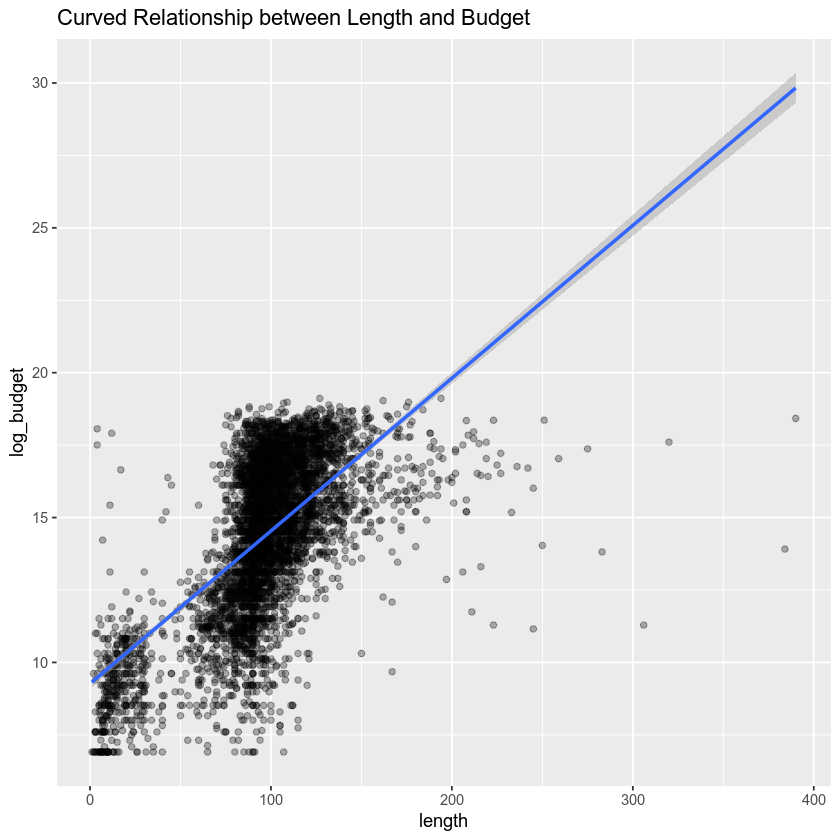

In [219]:
ggplot(df, aes(x = length, y = log_budget)) +
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm") + 
  labs(title = "Curved Relationship between Length and Budget")

`geom_smooth()` using formula = 'y ~ x'


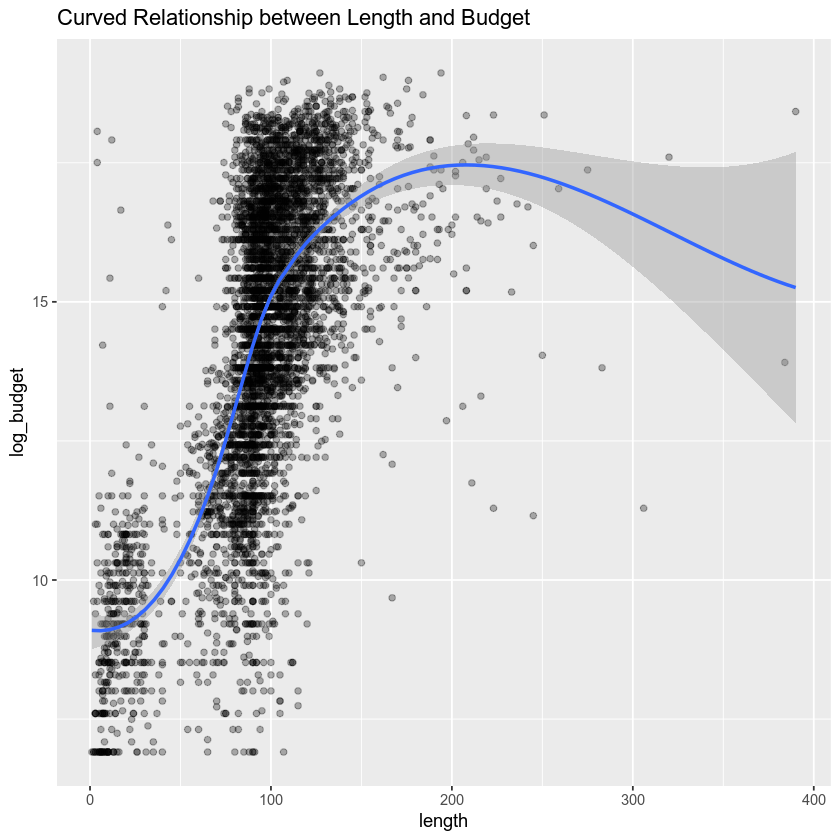

In [220]:
ggplot(df, aes(x = length, y = log_budget)) +
  geom_point(alpha = 0.3) +
  geom_smooth(method = "loess") + 
  labs(title = "Curved Relationship between Length and Budget")

year

`geom_smooth()` using formula = 'y ~ x'


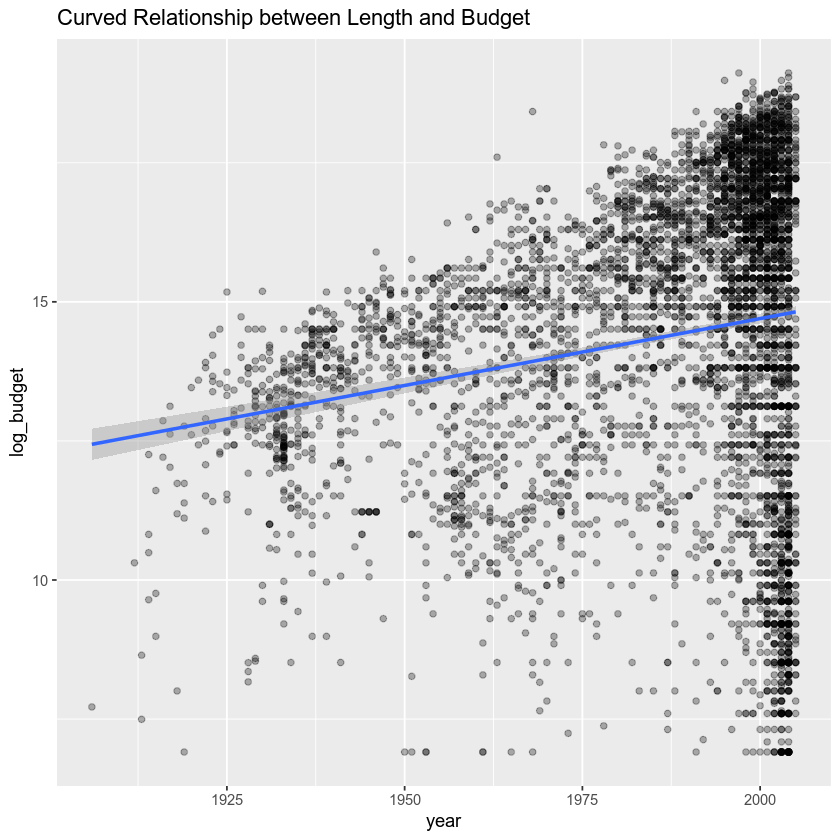

In [221]:
ggplot(df, aes(x = year, y = log_budget)) +
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm") + 
  labs(title = "Curved Relationship between Length and Budget")

`geom_smooth()` using formula = 'y ~ x'


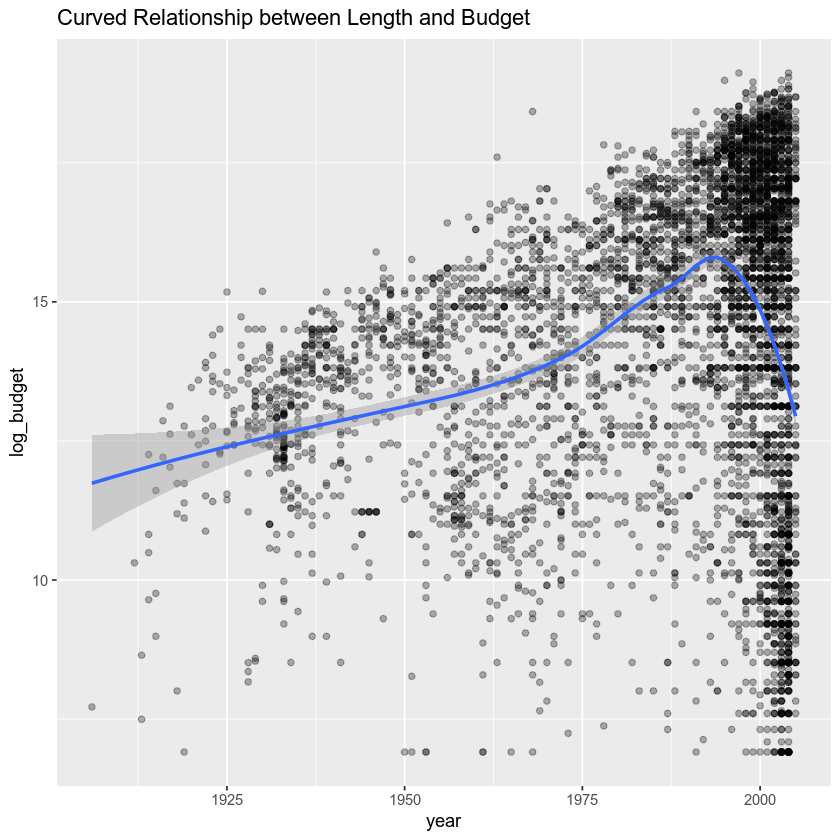

In [222]:
ggplot(df, aes(x = year, y = log_budget)) +
  geom_point(alpha = 0.3) +
  geom_smooth(method = "loess") + 
  labs(title = "Curved Relationship between Length and Budget")

Observations:

- Data is messy, there must be some interaction missing between these two valuues
- Stronger linear pattern between length of movie and log budget


### Multivariate Predictors

– Should you fit a linear or curved function for year?

    curved model

– Should you fit a linear or curved function for length?

    curved model/linear, either could work fine

– Doyou need an interaction between year and length?

    Yes

– What span should you use in your loess smoother?

    different spans will be tested and the model performance will be noted

– Should you fit using least squares or a robust fit?

    Both models will be compared 

Least Squares

In [223]:
ols_predictor = lm(data =  df, formula = log_budget ~ year * length)

In [224]:
ols_df <- augment(ols_predictor, type.predict='response')

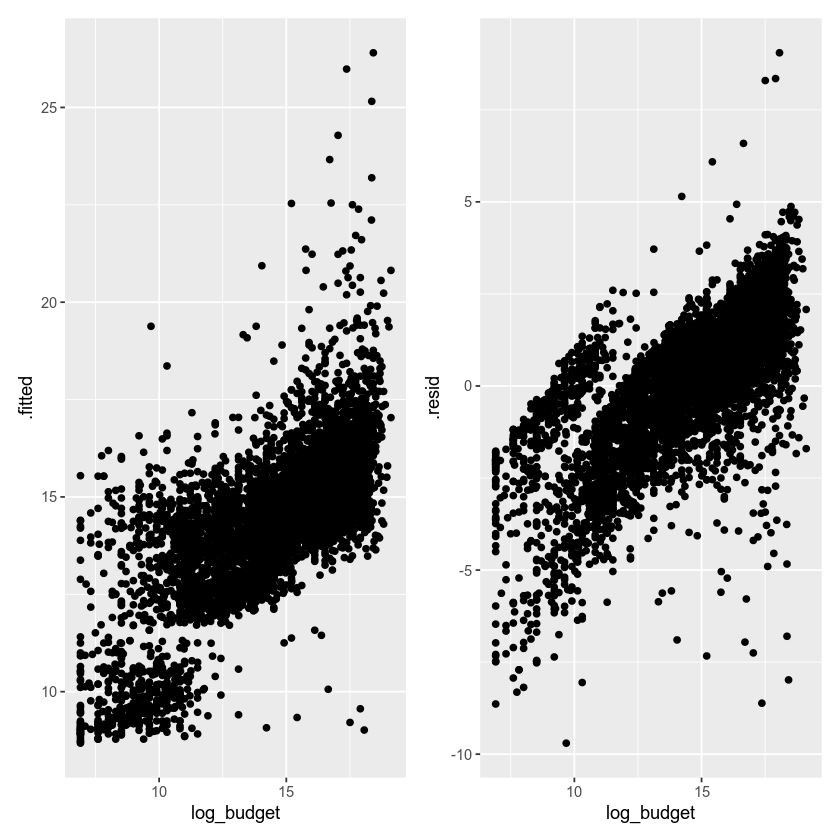

In [225]:
p1 <- ggplot(ols_df, aes(x= log_budget, y=.fitted )) +
    geom_point()


p2 <- ggplot(ols_df, aes(x = log_budget, y=.resid)) +
    geom_point()


p1 + p2

Robust

In [226]:
loess_predictor = loess(data =  df, formula = log_budget ~ year * length, span=1,  degree = 2, conditional="C", family = "symmetric")

In [227]:
loess_df <-  augment(loess_predictor, type.predict='response')

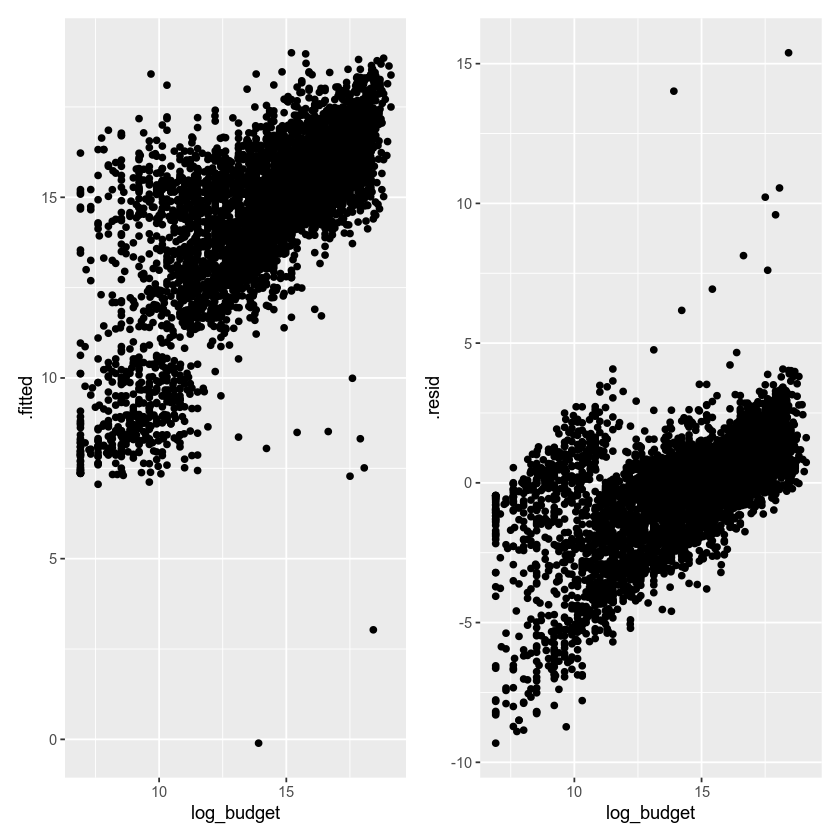

In [228]:

p1 <- ggplot(loess_df, aes(x= log_budget, y=.fitted )) +
    geom_point()


p2 <- ggplot(loess_df, aes(x = log_budget, y=.resid)) +
    geom_point()


p1 + p2

### Co plots

equal groups of length

In [229]:
grouped_length <- df %>% 
                mutate(length_group = cut(length, breaks =5, labels = c("short", "med_short", "med", "med_long", "long" ))) %>%
                group_by(length_group, year) %>%
                summarise(average_budget = mean(log_budget))
            

`summarise()` has grouped output by 'length_group'. You can override using the
`.groups` argument.


ntile groups

In [230]:
grouped_length <- df %>%
  mutate(length_group = ntile(length, 5),
         length_group = factor(length_group, 
                               levels = 1:5, 
                               labels = c("short", "med_short", "med", "med_long", "long"))) %>%
  group_by(length_group, year) %>%
  summarise(average_budget = mean(log_budget, na.rm = TRUE))

`summarise()` has grouped output by 'length_group'. You can override using the
`.groups` argument.


`geom_smooth()` using formula = 'y ~ x'


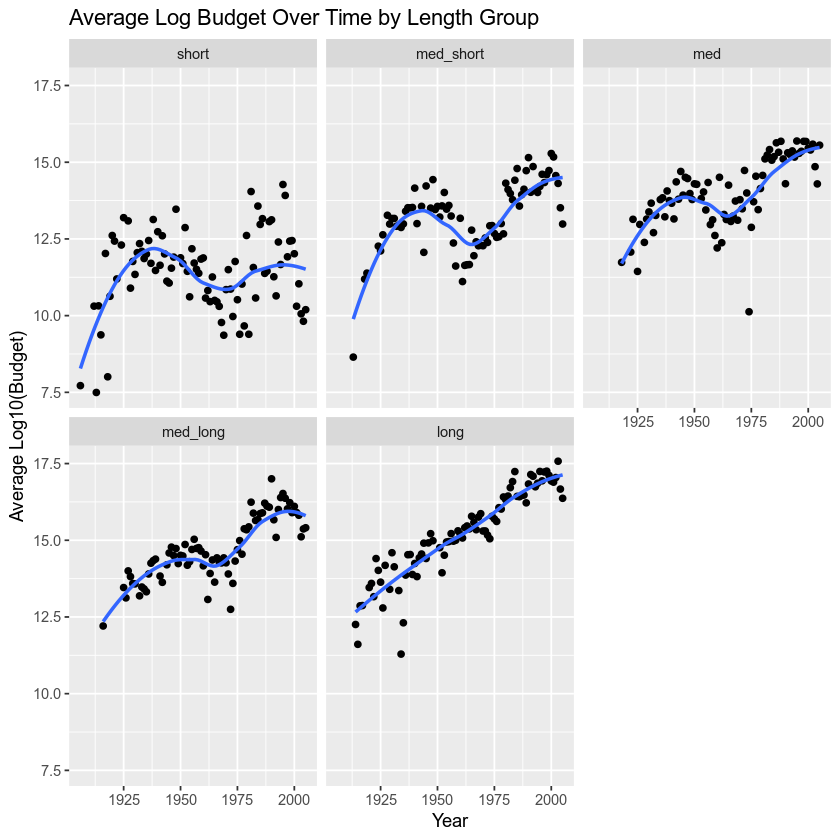

In [231]:
ggplot(grouped_length, aes(x = year, y = average_budget)) +
  geom_point() +
  geom_smooth(method="loess", se = FALSE) +
  facet_wrap(~ length_group) +
  labs(title = "Average Log Budget Over Time by Length Group",
       x = "Year",
       y = "Average Log10(Budget)")

In [241]:
range(df$year)

[1] 1906 2005

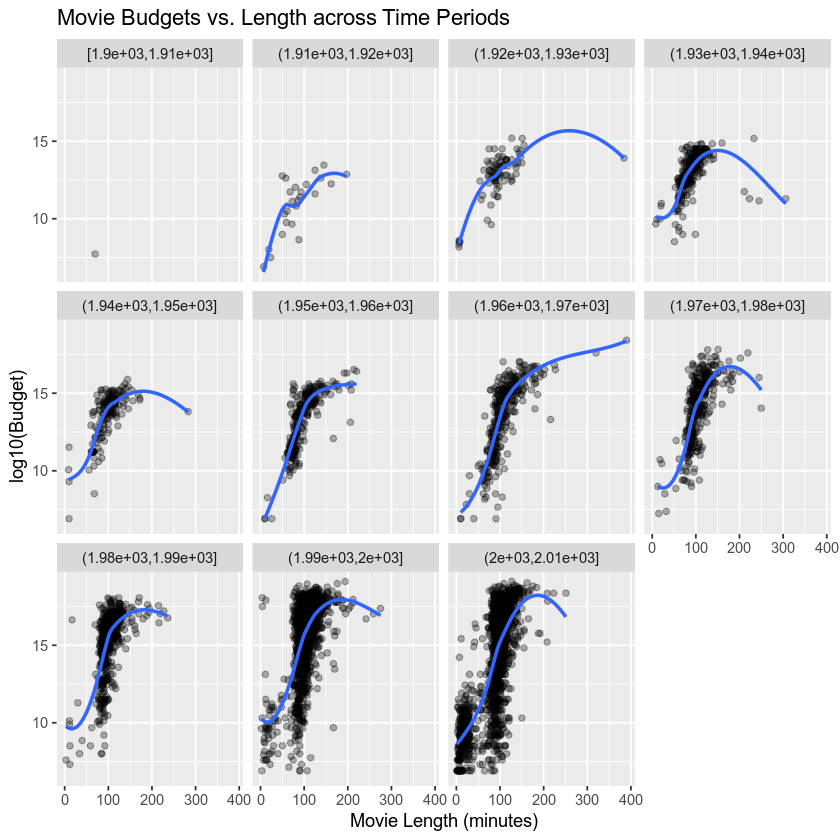

In [240]:
df$year_bin <- cut(df$year, 
               breaks = seq(1900, 2010, by = 10),
               right = TRUE,
               include.lowest = TRUE)

# Plot
ggplot(df, aes(x = length, y = log_budget)) +
  geom_point(alpha = 0.3) +
  geom_smooth(method = "loess", formula = y ~ x, se = FALSE) +
  facet_wrap(~ year_bin) +
  labs(title = "Movie Budgets vs. Length across Time Periods",
       x = "Movie Length (minutes)",
       y = "log10(Budget)")